In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# loading dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
# Converting dataset to DataFrame object
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


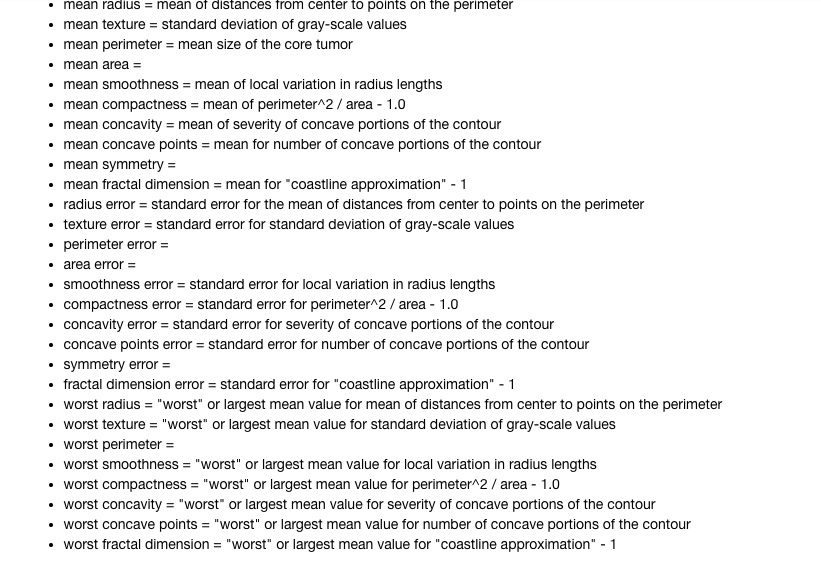

In [4]:
from IPython.display import Image
Image("C:/Users/HP/Desktop/feature_names.png")

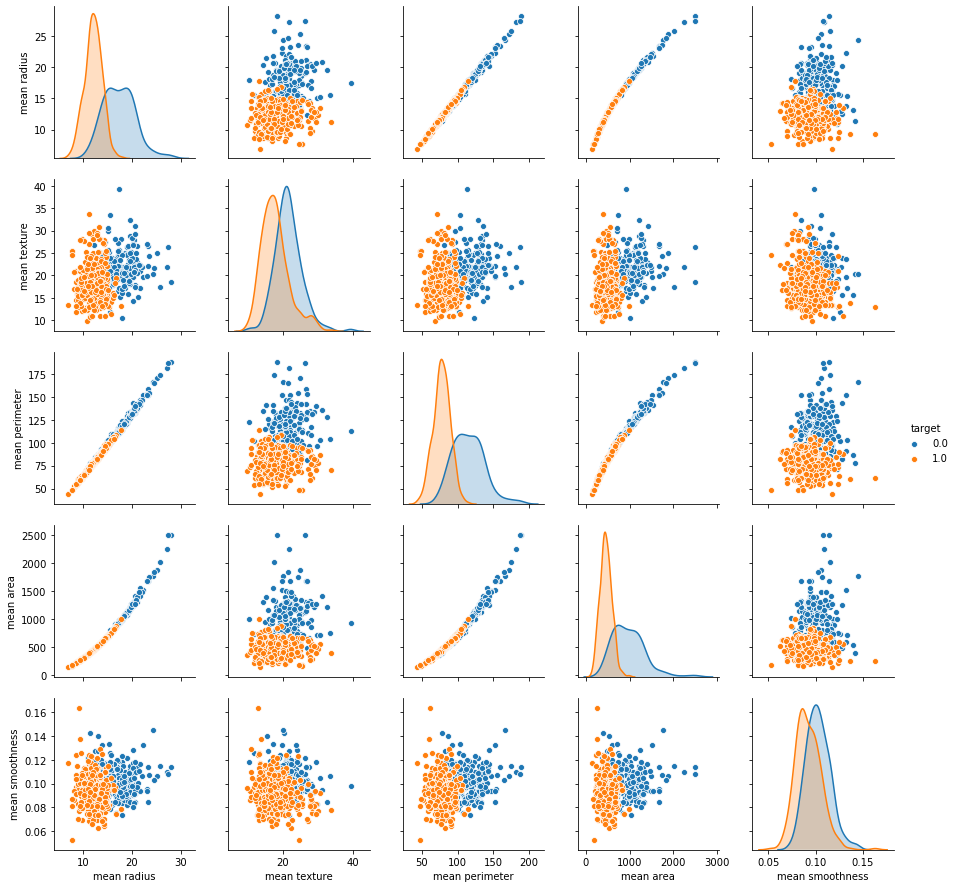

In [5]:
sns.pairplot(df_cancer, hue='target', vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness'])

# Orange = Benign=> No cancer. 1
#Blue = Malignant=>Cancer. 0

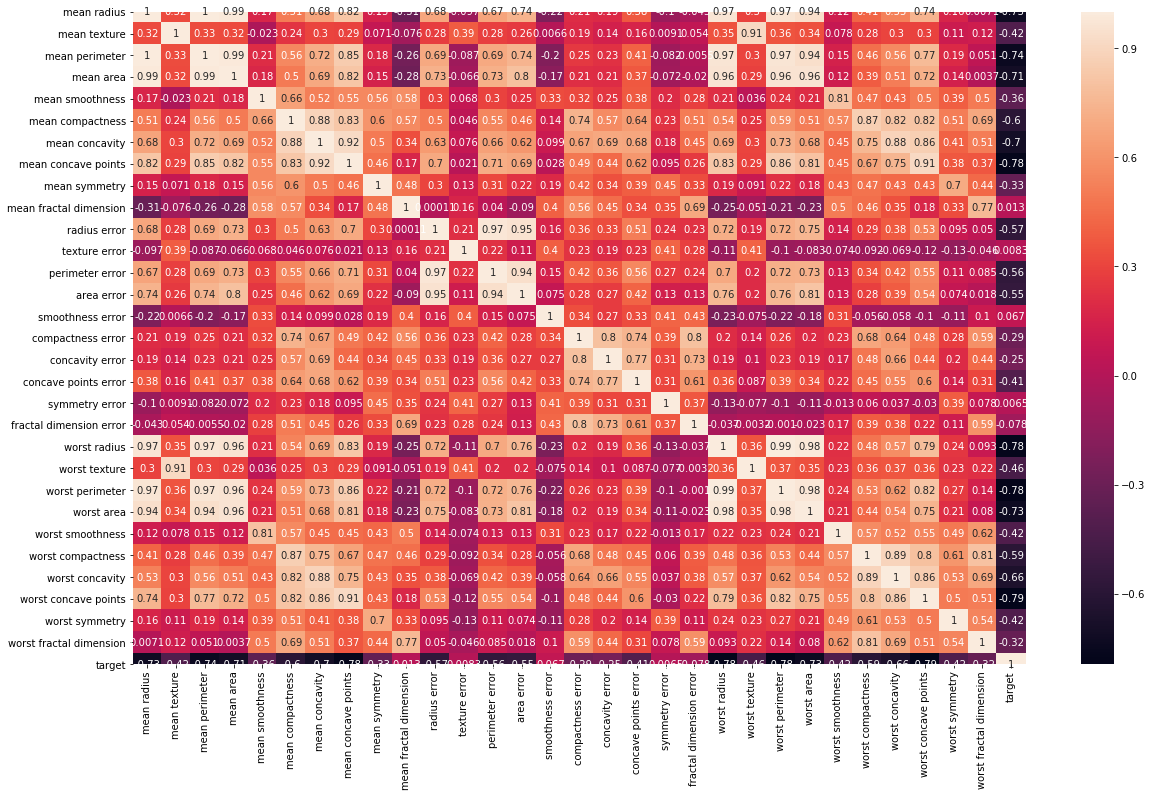

In [8]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cancer.corr(),annot=True)

In [9]:
# Creating input features
X = df_cancer.drop(['target'],axis= 1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Creating target feature
y = df_cancer['target']
y.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Splitting the whole dataset in test and train subsets with 20/80 ratio.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [15]:
print('size of training input features', X_train.shape)
print('size of testing input features', X_test.shape)
print('size of training output features', y_train.shape)
print('size of testing output features', y_test.shape)

size of training input features (455, 30)
size of testing input features (114, 30)
size of training output features (455,)
size of testing output features (114,)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Training the logisticRegression Classifier
log_reg = LogisticRegression(random_state=42).fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
y_pred = log_reg.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
cm= np.array(confusion_matrix(y_test,y_pred,labels=[1,0]))
print(cm)

[[63  3]
 [ 4 44]]


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        48
         1.0       0.94      0.95      0.95        66

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [24]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

In [25]:
y_pred_knn = knn.predict(X_test) 

In [26]:
cm_2 = np.array(confusion_matrix(y_test,y_pred_knn,labels = [1,0]))

In [27]:
cm

array([[63,  3],
       [ 4, 44]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.92        48
         1.0       0.93      0.97      0.95        66

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



## Improving the Model!

In [29]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Scaling the input data
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [32]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y,test_size = 0.2,random_state = 20)

In [33]:
log_reg_scaled = LogisticRegression(random_state=42).fit(X_train_scaled,y_train_scaled)
y_pred_scaled = log_reg_scaled.predict(X_test_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
cm= np.array(confusion_matrix(y_test_scaled,y_pred_scaled,labels=[1,0]))
print(cm)

[[66  0]
 [ 1 47]]


In [35]:
print(classification_report(y_test_scaled,y_pred_scaled))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [36]:
knn_scaled = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled,y_train_scaled)
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)

In [37]:
cm= np.array(confusion_matrix(y_test_scaled,y_pred_knn_scaled,labels=[1,0]))
print(cm)

[[64  2]
 [ 3 45]]


In [38]:
print(classification_report(y_test_scaled,y_pred_knn_scaled))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        48
         1.0       0.96      0.97      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

